# Strategies for dealing with imbalanced data

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
matplotlib.rcParams['font.sans-serif'] = "Verdana"
matplotlib.rcParams['font.family'] = "sans-serif"

## Helper functions

In [2]:
def separate_classes(X,Y):
    c0_indices = np.nonzero(Y==0)
    c1_indices = np.nonzero(Y==1)
    Xmin = X[c0_indices]
    Ymin = Y[c0_indices]
    Xmaj = X[c1_indices]
    Ymaj = Y[c1_indices]
    return Xmin, Ymin, Xmaj, Ymaj

def plotScatterFigures(X, Y, title='Plot title', file_ext=1):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y)
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=30, c=colorMaj, edgecolor='k', linewidth=0.2)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=30, c=colorMin, edgecolor='k', linewidth=0.5)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.set_xlim([-2,4])
    ax.set_ylim([-4,4])
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([]), ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+str(file_ext)+'.png', bbox_inches='tight', dpi=300)   

## 1.1 Random undersampling (imblearn)
Removes random samples from the majority class.

Samples in minority class: 10
Samples in majority class: 1000
Samples in minority class: 10
Samples in majority class: 10


<Figure size 800x800 with 0 Axes>

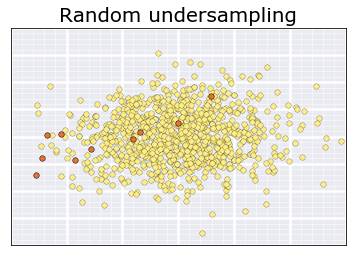

<Figure size 800x800 with 0 Axes>

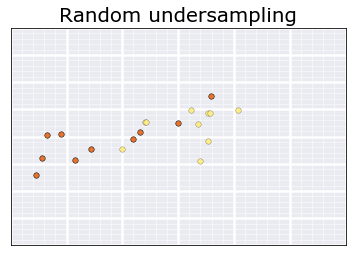

In [3]:
X, Y = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=1,
                             n_samples=1010,
                             weights=[0.006, 0.994],
                             n_clusters_per_class=1,
                             random_state=6)
plotScatterFigures(X, Y, 'Random undersampling',1)

# Undersampling data
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_iru, Y_iru = rus.fit_sample(X, Y)
plotScatterFigures(X_iru, Y_iru, 'Random undersampling',2)

## 1.2 Centroid-based undersampling
Replaces a cluster of majority samples by the cluster centroid using KMeans.

Samples in minority class: 10
Samples in majority class: 1000
Samples in minority class: 10
Samples in majority class: 10


<Figure size 800x800 with 0 Axes>

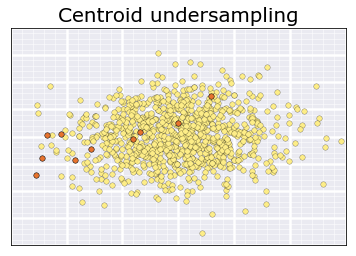

<Figure size 800x800 with 0 Axes>

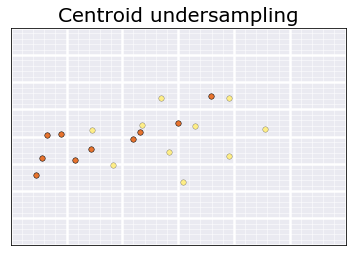

In [4]:
np.random.seed(1)
X, Y = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=1,
                             n_samples=1010,
                             weights=[0.006, 0.994],
                             n_clusters_per_class=1,
                             random_state=6)
plotScatterFigures(X, Y, 'Centroid undersampling',1)

# Undersampling data
from imblearn.under_sampling import ClusterCentroids
# Keep 10 items from class 1, and all minority class 0
cc = ClusterCentroids(ratio={1: 10})
X_icc, Y_icc = cc.fit_sample(X, Y)
plotScatterFigures(X_icc, Y_icc, 'Centroid undersampling',2)

## 1.3 Tomek links

"Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process."

"A tomek’s link exist if the two samples are the nearest neighbors of each other"

**Paper:** I. Tomek, “Two modifications of CNN,” In Systems, Man, and Cybernetics, IEEE Transactions on, vol. 6, pp 769-772, 2010


Samples in minority class: 10
Samples in majority class: 40
Samples in minority class: 10
Samples in majority class: 34


<Figure size 800x800 with 0 Axes>

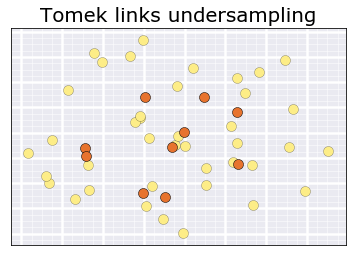

<Figure size 800x800 with 0 Axes>

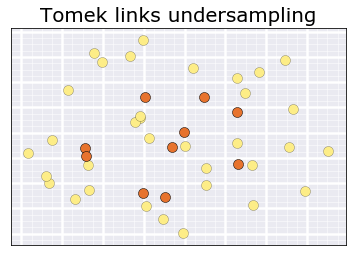

In [5]:
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rc('axes', edgecolor='#000000') #black

def plotScatterFigures(X, Y, title='Plot title'):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y)
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=100, c=colorMaj, edgecolor='k', linewidth=0.2)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=100, c=colorMin, edgecolor='k', linewidth=0.5)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+'1.png', bbox_inches='tight', dpi=300)
    
def plotCircles(Xmin, Ymin, Xmaj, Ymaj, title='Plot title'):
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=100, c=colorMaj, edgecolor='k', linewidth=0.2)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=100, c=colorMin, edgecolor='k', linewidth=0.5)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+'2.png', bbox_inches='tight', dpi=300)

# Generate minority class
np.random.seed(1)
pts = 10
X0 = np.zeros((pts,2))
Y0 = np.zeros((pts,1))
for i in range(pts):
    length = np.sqrt(np.random.uniform(0, 1))
    angle = 2*np.pi * np.random.uniform(0, 1)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    X0[i,0] = x
    X0[i,1] = y
    Y0[i] = 0

# Generate majority class
pts = 40
X1 = np.zeros((pts,2))
Y1 = np.zeros((pts,1))
for i in range(pts):
    length = np.sqrt(np.random.uniform(0, 1))
    angle = 2*np.pi * np.random.uniform(0, 1)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    X1[i,0] = x
    X1[i,1] = y
    Y1[i] = 1

plotCircles(X0, Y0, X1, Y1, 'Tomek links undersampling')
X = np.concatenate((X0,X1), axis = 0)
Y = np.concatenate((Y0,Y1), axis = 0)

# Removing Tomek links
from imblearn.under_sampling import TomekLinks
# Ratio paremer set to resample the majority class
tl = TomekLinks(return_indices=True, ratio='majority')
X_itl, Y_itl, idx = tl.fit_sample(X, Y.ravel())
plotScatterFigures(X_itl, Y_itl, 'Tomek links undersampling')

## 2.1 Oversampling by random duplication of the minority class

Samples in minority class: 10
Samples in majority class: 1000
Samples in minority class: 1000
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

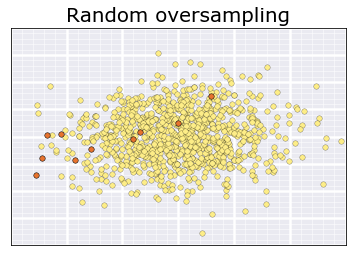

<Figure size 800x800 with 0 Axes>

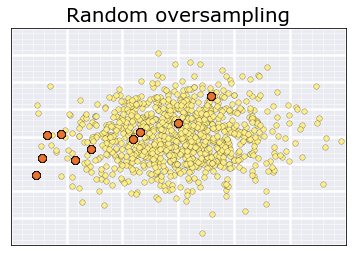

In [6]:
def plotScatterFigures(X, Y, title='Plot title', file_ext=1):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y)
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=30, c=colorMaj, edgecolor='k', linewidth=0.2)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=file_ext*30, c=colorMin, edgecolor='k', linewidth=0.5)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.set_xlim([-2,4])
    ax.set_ylim([-4,4])
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([]), ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+str(file_ext)+'.png', bbox_inches='tight', dpi=300)
    
# Generate data
np.random.seed(1)
X, Y = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=1,
                             n_samples=1010,
                             weights=[0.006, 0.994],
                             n_clusters_per_class=1,
                             random_state=6)
plotScatterFigures(X, Y, 'Random oversampling',1)

# Oversampling data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(ratio='minority')
X_iro, Y_iro = ros.fit_sample(X, Y)
plotScatterFigures(X_iro, Y_iro, 'Random oversampling',2)

## 2.2 Synthetic Minority Over-sampling (SMOTE)

SMOTE generates noisy samples from "interpolations of the minority class"

"The SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors."

**Paper:** N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research, 321-357, 2002.

Samples in minority class: 6
Samples in majority class: 3
Samples in minority class: 6
Samples in majority class: 6
Samples in minority class: 10
Samples in majority class: 1000
Samples in minority class: 1000
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

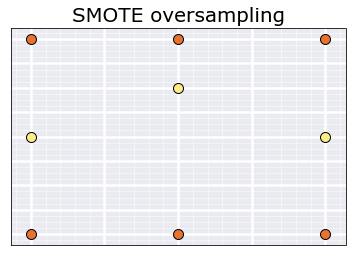

<Figure size 800x800 with 0 Axes>

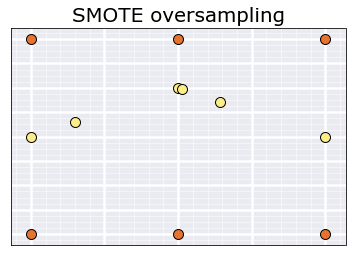

<Figure size 800x800 with 0 Axes>

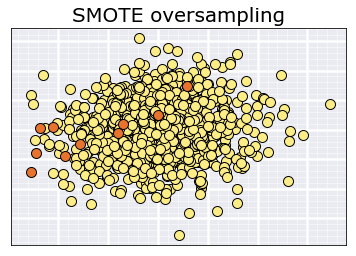

<Figure size 800x800 with 0 Axes>

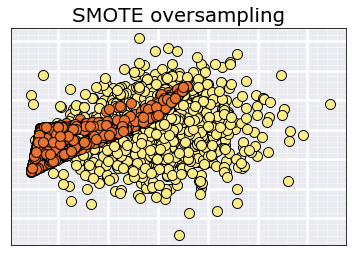

In [7]:
def plotScatterFigures(X, Y, title='Plot title', file_ext=1):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y)
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=100, c=colorMaj, edgecolor='k', linewidth=1)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=100, c=colorMin, edgecolor='k', linewidth=1)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([]), ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+str(file_ext)+'.png', bbox_inches='tight', dpi=300)

# Easy dataset
X = np.array([[1,1],[2,1],[3,1],[1,3],[2,3],[3,3],[1,2],[2,2.5],[3,2]])
Y = np.array([0,0,0,0,0,0,1,1,1])
plotScatterFigures(X, Y, 'SMOTE oversampling',1)

# SMOTE on easy dataset
from imblearn.over_sampling import SMOTE
# Resample only the minority class
smote = SMOTE(ratio='minority',k_neighbors=1, random_state=4)
X_ism, Y_ism = smote.fit_sample(X, Y)
plotScatterFigures(X_ism, Y_ism, 'SMOTE oversampling',2)

# Original example
np.random.seed(1)
X, Y = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=1,
                             n_samples=1010,
                             weights=[0.006, 0.994],
                             n_clusters_per_class=1,
                             random_state=6)
plotScatterFigures(X, Y, 'SMOTE oversampling',5)

# SMOTE
from imblearn.over_sampling import SMOTE
# Resample only the minority class
smote = SMOTE(ratio='minority', random_state=4)
X_ism, Y_ism = smote.fit_sample(X, Y)
plotScatterFigures(X_ism, Y_ism, 'SMOTE oversampling',6)


## 2.3 Adaptive Synthetic (ADASYN)

"This is a major difference compared to the SMOTE algorithm, in which equal numbers of synthetic samples are generated for each minority data example. Our objective here is to providing different weights for different minority examples to compensate for the skewed distributions"

**Paper:** He, Haibo, Yang Bai, Edwardo A. Garcia, and Shutao Li. “ADASYN: Adaptive synthetic sampling approach for imbalanced learning” In IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), pp. 1322-1328, 2008.

Samples in minority class: 10
Samples in majority class: 1000
Samples in minority class: 997
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

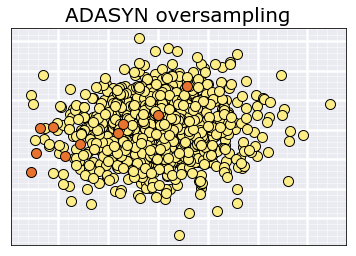

<Figure size 800x800 with 0 Axes>

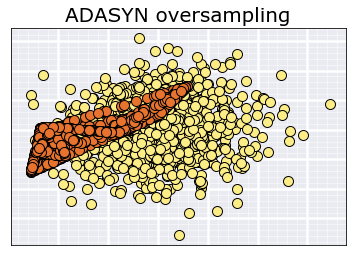

In [8]:
def plotScatterFigures(X, Y, title='Plot title', file_ext=1):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y)
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=100, c=colorMaj, edgecolor='k', linewidth=1)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=100, c=colorMin, edgecolor='k', linewidth=1)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([]), ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+str(file_ext)+'.png', bbox_inches='tight', dpi=300)

# Original example
np.random.seed(1)
X, Y = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=1,
                             n_samples=1010,
                             weights=[0.006, 0.994],
                             n_clusters_per_class=1,
                             random_state=6)
plotScatterFigures(X, Y, 'ADASYN oversampling',1)

# ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(ratio='minority', random_state=4)
X_iad, Y_iad = adasyn.fit_sample(X, Y)
plotScatterFigures(X_iad, Y_iad, 'ADASYN oversampling',2)

## 3. Oversamplig and Undersampling (SMOTE + Tomek links)

Combininig oversampling and undersampling, using the SMOTE and Tomek links.

Samples in minority class: 10
Samples in majority class: 1000
Samples in minority class: 1000
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

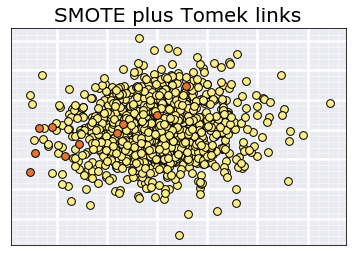

<Figure size 800x800 with 0 Axes>

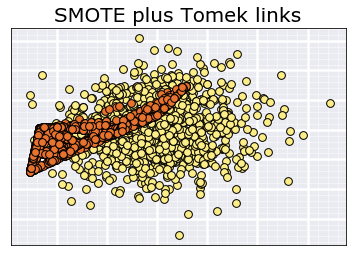

In [9]:
def plotScatterFigures(X, Y, title='Plot title', file_ext=1):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y)
    colorMin = '#E7732E'
    colorMaj = '#FDED87'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=60, c=colorMaj, edgecolor='k', linewidth=1)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=60, c=colorMin, edgecolor='k', linewidth=1)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([]), ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+str(file_ext)+'.png', bbox_inches='tight', dpi=300)

# Original example
np.random.seed(1)
X, Y = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=1,
                             n_samples=1010,
                             weights=[0.006, 0.994],
                             n_clusters_per_class=1,
                             random_state=6)
plotScatterFigures(X, Y, 'SMOTE plus Tomek links',1)
# SMOTETomek
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, Y)
plotScatterFigures(X_ism, Y_ism, 'SMOTE plus Tomek links',2)